# Multiple Linear Regression in Statsmodels

## Introduction

In this lecture, you'll learn how to run your first multiple linear regression model.

## Objectives
You will be able to:
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters

## Statsmodels for multiple linear regression

This lesson will be more of a code-along, where you'll walk through a multiple linear regression model using both statsmodels and scikit-learn. 

The regression model determines a line of best fit by minimizing the sum of squares of the errors between the models predictions and the actual data. In intro algebra and statistics classes, this is often limited to the simple 2 variable case of $y=mx+b$, but this process can be generalized to use multiple predictive variables.

## Auto-mpg data
* Creating dummy variables for each categorical feature
* Log-transforming select continuous predictors

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
data = pd.read_csv('https://raw.githubusercontent.com/learn-co-students/dsc-multiple-linear-regression-in-statsmodels-london-ds-02172020/master/auto-mpg.csv') 
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


To learn more about the dataset, we can read about it here https://archive.ics.uci.edu/ml/datasets/auto+mpg

The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

In [47]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [48]:
# convert float to int 
data['horsepower'].astype(str).astype('float64')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
387     86.0
388     52.0
389     84.0
390     79.0
391     82.0
Name: horsepower, Length: 392, dtype: float64

## Basic Data Visualization

- Visualize to see the relationship of variables which may help us selecting variables to create a model

In [49]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

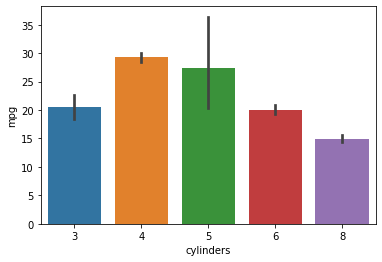

In [50]:
# cylinders
sns.barplot(data=data, x="cylinders", y="mpg",
            estimator=np.average)

# also has a 95% confidence interval 

- https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

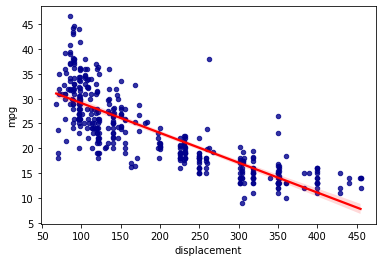

In [69]:
# displacement
sns.regplot(data=data, x="displacement", y="mpg",
            scatter_kws={"color": "darkblue",'s': 20},
            line_kws={"color": "red"})

<AxesSubplot:xlabel='model year', ylabel='mpg'>

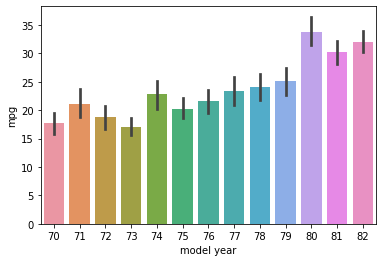

In [70]:
# model
sns.barplot(data=data, x="model year", y="mpg",
           estimator=np.average)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

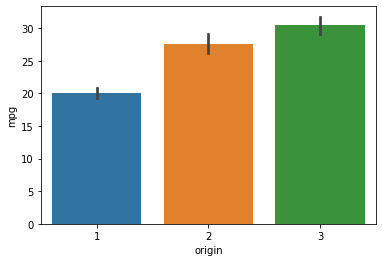

In [71]:
# origin
sns.barplot(data=data, x="origin", y="mpg",
           estimator=np.average)

- 

In [51]:
# create additional features + feature engineering
acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))


In [52]:
data_fin = pd.DataFrame([])
data_fin

""


In [53]:
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight


In [54]:
data_fin.head()

,acc,disp,horse,weight
0,0.238095,1.125829,0.173727,0.720986
1,0.208333,1.372223,0.321860,0.908047
2,0.178571,1.191999,0.262641,0.651205
3,0.238095,1.107370,0.262641,0.648095
4,0.148810,1.094964,0.219773,0.664652


In [55]:
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)


In [56]:
cyl_dummies

,cyl_4,cyl_5,cyl_6,cyl_8
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
387,1,0,0,0
388,1,0,0,0
389,1,0,0,0
390,1,0,0,0


In [73]:
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

In [74]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   mpg     392 non-null    float64
 2   acc     392 non-null    float64
 3   disp    392 non-null    float64
 4   horse   392 non-null    float64
 5   weight  392 non-null    float64
 6   cyl_4   392 non-null    uint8  
 7   cyl_5   392 non-null    uint8  
 8   cyl_6   392 non-null    uint8  
 9   cyl_8   392 non-null    uint8  
 10  yr_71   392 non-null    uint8  
 11  yr_72   392 non-null    uint8  
 12  yr_73   392 non-null    uint8  
 13  yr_74   392 non-null    uint8  
 14  yr_75   392 non-null    uint8  
 15  yr_76   392 non-null    uint8  
 16  yr_77   392 non-null    uint8  
 17  yr_78   392 non-null    uint8  
 18  yr_79   392 non-null    uint8  
 19  yr_80   392 non-null    uint8  
 20  yr_81   392 non-null    uint8  
 21  yr_82   392 non-null    uint8  
 22  or

For now, let's simplify the model and only inlude `'acc'`, `'horse'` and the three `'orig'` categories in our final data.

In [75]:
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis=1)
data_ols.head()

,mpg,acceleration,weight,orig_2,orig_3
0,18.0,0.238095,0.720986,0,0
1,15.0,0.208333,0.908047,0,0
2,18.0,0.178571,0.651205,0,0
3,16.0,0.238095,0.648095,0,0
4,17.0,0.148810,0.664652,0,0


## A linear model using statsmodels

Now, let's use the `statsmodels.api` to run OLS on all of the data. Just like for linear regression with a single predictor, you can use the formula $y \sim X$ with $n$ predictors where $X$ is represented as $x_1+\ldots+x_n$.

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [77]:
formula = 'mpg ~ acceleration+weight+orig_2+orig_3'
model = ols(formula=formula, data=data_ols).fit()

Having to type out all the predictors isn't practical when you have many. Another better way than to type them all out is to seperate out the outcome variable `'mpg'` out of your DataFrame, and use the a `'+'.join()` command on the predictors, as done below:

In [83]:
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = '+'.join(predictors.columns)
print("Predictors:", pred_sum)
formula = outcome + '~' + pred_sum
print("Formula:", formula)

Predictors: acceleration+weight+orig_2+orig_3
Formula: mpg~acceleration+weight+orig_2+orig_3


In [81]:
model = ols(formula=formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sat, 14 Jan 2023   Prob (F-statistic):          1.86e-107
Time:                        00:57:04   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.7608      0.688     30.181      0.000      19.408      22.113
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_2           0.4124      0.639      0.645      0.519      -0.844       1.669
orig_3           1.7218      0.653      2.638      0.009       0.438       3.005
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                         8.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Or even easier, simply use the `ols()` function from `statsmodels.api`. The advantage is that you don't have to create the summation string. Important to note, however, is that the intercept term is not included by default, so you have to make sure you manipulate your `predictors` DataFrame so it includes a constant term. You can do this using `.add_constant`.

In [84]:
import statsmodels.api as sm

In [85]:
predictors_int = sm.add_constant(predictors)
predictors_int

,const,acceleration,weight,orig_2,orig_3
0,1.0,0.238095,0.720986,0,0
1,1.0,0.208333,0.908047,0,0
2,1.0,0.178571,0.651205,0,0
3,1.0,0.238095,0.648095,0,0
4,1.0,0.148810,0.664652,0,0
...,...,...,...,...,...
387,1.0,0.452381,-0.090383,0,0
388,1.0,0.988095,-1.051504,1,0
389,1.0,0.214286,-0.785832,0,0
390,1.0,0.630952,-0.307450,0,0


In [87]:
model = sm.OLS(data['mpg'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sat, 14 Jan 2023   Prob (F-statistic):          1.86e-107
Time:                        01:01:44   Log-Likelihood:                -1107.2
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     387   BIC:                             2244.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           20.7608      0.688     30.181      0.000      19.408      22.113
acceleration     5.0494      1.389      3.634      0.000       2.318       7.781
weight          -5.8764      0.282    -20.831      0.000      -6.431      -5.322
orig_2           0.4124      0.639      0.645      0.519      -0.844       1.669
orig_3           1.7218      0.653      2.638      0.009       0.438       3.005
==============================================================================
Omnibus:                       37.427   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.989
Skew:                           0.648   Prob(JB):                     6.95e-13
Kurtosis:                       4.322   Cond. No.                         8.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interpretation 
Just like for single multiple regression, the coefficients for the model should be interpreted as "how does  change for each additional unit "? However, do note that since  was transformed, the interpretation can sometimes require a little more attention. In fact, as the model is built on the transformed , the actual relationship is "how does  change for each additional unit ", where  is the (log- and min-max, standardized,...) transformed data matrix.

# Linear regression using scikit-learn
You can also repeat this process using scikit-learn. The code to do this can be found below. The scikit-learn package is known for its machine learning functionalities and generally very popular when it comes to building a clear data science workflow. It is also commonly used by data scientists for regression. The disadvantage of scikit-learn compared to statsmodels is that it doesn't have some statistical metrics like the p-values of the parameter estimates readily available. For a more ad-hoc comparison of scikit-learn and statsmodels, you can read this blogpost: https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/.

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
# define target variable
y = data_ols['mpg']

# define model 
linreg = LinearRegression()

# fit the model
linreg.fit(predictors, y)

LinearRegression()

In [90]:
# coefficients
linreg.coef_

array([ 5.04941007, -5.87640551,  0.41237454,  1.72184708])

The intercept of the model is stored in the `.intercept_` attribute.

In [91]:
# intercept
linreg.intercept_

20.76075708082184

In [92]:
linreg.predict(predictors)

array([17.72619059, 16.4766627 , 17.83569177, 18.15452924, 17.60639382,
       12.64304784, 12.27991867, 12.33246266, 12.24201812, 14.70381071,
       16.77567874, 15.90614215, 15.49375908, 19.78309963, 28.51387241,
       23.22605376, 23.66642904, 25.27706086, 30.61531108, 34.22857399,
       25.46382041, 26.54862999, 27.92935249, 27.70721054, 24.48883948,
       12.56455864, 13.9778177 , 13.49830725, 13.39321134, 30.61531108,
       27.91739461, 29.52379721, 23.99864083, 19.16995092, 19.85018131,
       20.02058248, 20.109488  , 13.89030979, 12.50924678, 14.61637778,
       14.76031396, 10.32573274, 11.37775508,  9.70900554, 21.69319625,
       27.67907884, 19.99742625, 20.77930654, 27.87721826, 29.22443774,
       31.36612835, 29.95432602, 35.80641244, 37.48483518, 33.78913992,
       32.490721  , 29.51024822, 29.68419612, 30.82687763, 27.82935891,
       28.57214211, 13.56964016, 13.03314664, 14.71230407, 14.59240812,
       16.59598818, 11.5814246 , 12.93299999, 13.14789981, 13.00

In [96]:
data_ols['mpg'].to_list()


[18.0,
 15.0,
 18.0,
 16.0,
 17.0,
 15.0,
 14.0,
 14.0,
 14.0,
 15.0,
 15.0,
 14.0,
 15.0,
 14.0,
 24.0,
 22.0,
 18.0,
 21.0,
 27.0,
 26.0,
 25.0,
 24.0,
 25.0,
 26.0,
 21.0,
 10.0,
 10.0,
 11.0,
 9.0,
 27.0,
 28.0,
 25.0,
 19.0,
 16.0,
 17.0,
 19.0,
 18.0,
 14.0,
 14.0,
 14.0,
 14.0,
 12.0,
 13.0,
 13.0,
 18.0,
 22.0,
 19.0,
 18.0,
 23.0,
 28.0,
 30.0,
 30.0,
 31.0,
 35.0,
 27.0,
 26.0,
 24.0,
 25.0,
 23.0,
 20.0,
 21.0,
 13.0,
 14.0,
 15.0,
 14.0,
 17.0,
 11.0,
 13.0,
 12.0,
 13.0,
 19.0,
 15.0,
 13.0,
 13.0,
 14.0,
 18.0,
 22.0,
 21.0,
 26.0,
 22.0,
 28.0,
 23.0,
 28.0,
 27.0,
 13.0,
 14.0,
 13.0,
 14.0,
 15.0,
 12.0,
 13.0,
 13.0,
 14.0,
 13.0,
 12.0,
 13.0,
 18.0,
 16.0,
 18.0,
 18.0,
 23.0,
 26.0,
 11.0,
 12.0,
 13.0,
 12.0,
 18.0,
 20.0,
 21.0,
 22.0,
 18.0,
 19.0,
 21.0,
 26.0,
 15.0,
 16.0,
 29.0,
 24.0,
 20.0,
 19.0,
 15.0,
 24.0,
 20.0,
 11.0,
 20.0,
 19.0,
 15.0,
 31.0,
 26.0,
 32.0,
 25.0,
 16.0,
 16.0,
 18.0,
 16.0,
 13.0,
 14.0,
 14.0,
 14.0,
 29.0,
 26.0,
 26.0,
 31.0,


## Summary

Congrats! You now know how to build a linear regression model with multiple predictors in statsmodel and scikit-learn. You also took a look at the statistical performance metrics pertaining to the overall model and its parameters!